# Mass Flow Parameter Analysis

<p>Through this data analysis process the goal is to determine a realistic profile of probable flow qualities that the CWAT system would be exposed to in north american non-arctic climates</p>

<br/>
<p>In order to determine likely flow characteristics, a random sample of 5 American cities was taken. These cities are:</p>
<ul>
<li>Dallas</li>
<li>Kansas City</li>
<li>San Diego</li>
<li>Los Angeles</li>
<li>San Francisco</li>
</ul>

<p>From these cities, data has been collected from a <a href="https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data/discussion/56293">Historical Hourly Weather Data set (2012-2017)</a>. The data will than be broken down into seasonal buckets, and determininatons of the following metrics will be preformed.</p>
<ul>
<li>Median Mean and Mode Values for:
<ul>
<li>Wind Speed</li>
<li>Humidity</li>
<li>Preassure</li>
<li>Altitude adjusted wind speed</li>
<li>Altitude adjusted wind preassure</li>

</ul>

<p>Altitude adjustments will be completed using the follwoing formula:  </p>

$$
v = v_{\text{ref}} \frac{\ln \left( \frac{z}{z_0} \right)}{\ln \left( \frac{z_{\text{ref}}}{z_0} \right)}
$$

<p>Where,
<ul>
<li>$$
    v = v_{\text{ref}}
    $$ is the reference ground velocity</li>
<li>$${z_0}$$ is roughness length of the geography = 1.6m for urban environments</li>
<li>z is the height above the ground</li>
<li>$${z_{\text{ref}}}$$ is the height at which $$v = v_{\text{ref}}$$ is taken</li>
</ul>

</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

city = "Nashville"

humidity = pd.read_csv("humidity.csv")
preassure = pd.read_csv("pressure.csv")
temperature = pd.read_csv("temperature.csv")
wind_direction = pd.read_csv("wind_direction.csv")
wind_speed = pd.read_csv("wind_speed.csv")

#now filter the data to only include the Nashville columns
humidity = humidity[['datetime', city]]
preassure = preassure[['datetime', city]]
temperature = temperature[['datetime', city]]
wind_direction = wind_direction[['datetime', city]]
wind_speed = wind_speed[['datetime', city]]

#now merge the dataframes
df = humidity.merge(preassure, on='datetime', how='left')
df = df.merge(temperature, on='datetime', how='left')
df = df.merge(wind_direction, on='datetime', how='left')
df = df.merge(wind_speed, on='datetime', how='left')

#now rename the columns
df.columns = ['datetime', 'humidity', 'preassure', 'temperature', 'wind_direction', 'wind_speed']

df.head(100)

/tmp/ipykernel_1012/643790731.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Nashville_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(wind_direction, on='datetime', how='left')


,datetime,humidity,preassure,temperature,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,100.0,1005.0,287.410000,70.0,4.0
2,2012-10-01 14:00:00,99.0,1004.0,287.421360,70.0,4.0
3,2012-10-01 15:00:00,99.0,1004.0,287.454637,70.0,4.0
4,2012-10-01 16:00:00,99.0,1004.0,287.487914,70.0,4.0
5,2012-10-01 17:00:00,99.0,1004.0,287.521190,70.0,4.0
6,2012-10-01 18:00:00,98.0,1004.0,287.554467,70.0,4.0
7,2012-10-01 19:00:00,98.0,1004.0,287.587744,70.0,4.0
8,2012-10-01 20:00:00,98.0,1004.0,287.621020,70.0,4.0
9,2012-10-01 21:00:00,97.0,1004.0,287.654297,70.0,4.0


In [6]:
def pre_process(city):
    
    humidity = humidity[['datetime', city]]
    preassure = preassure[['datetime', city]]
    temperature = temperature[['datetime', city]]
    wind_direction = wind_direction[['datetime', city]]
    wind_speed = wind_speed[['datetime', city]]
    df = humidity.merge(preassure, on='datetime', how='left')
    df = df.merge(temperature, on='datetime', how='left')
    df = df.merge(wind_direction, on='datetime', how='left')
    df = df.merge(wind_speed, on='datetime', how='left')

    #now rename the columns
    df.columns = ['datetime', 'humidity', 'preassure', 'temperature', 'wind_direction', 'wind_speed']


In [3]:
df.head(100)

,datetime,humidity,preassure,temperature,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,100.0,1005.0,287.410000,70.0,4.0
2,2012-10-01 14:00:00,99.0,1004.0,287.421360,70.0,4.0
3,2012-10-01 15:00:00,99.0,1004.0,287.454637,70.0,4.0
4,2012-10-01 16:00:00,99.0,1004.0,287.487914,70.0,4.0
...,...,...,...,...,...,...
95,2012-10-05 11:00:00,87.0,1024.0,286.880000,0.0,0.0
96,2012-10-05 12:00:00,100.0,1025.0,286.430000,0.0,0.0
97,2012-10-05 13:00:00,93.0,1025.0,288.450000,0.0,0.0
98,2012-10-05 14:00:00,88.0,1025.0,290.920000,170.0,1.0


## Column Units

1. Humidity: % (0-100)
2. Temperature (K)
3. preassure (hpa)
4. wind speed (m/s)
5. wind direction (degree)

In [5]:
#mean, median, mode, standard distribution and variance of wind speed
wind_speed_mean = df['wind_speed'].mean()
wind_speed_median = df['wind_speed'].median()
wind_speed_mode = df['wind_speed'].mode()
wind_speed_std = df['wind_speed'].std()
wind_speed_var = df['wind_speed'].var()

print("Mean: ", wind_speed_mean)
print("Median: ", wind_speed_median)
print("Mode: ", wind_speed_mode)
print("Standard Distribution: ", wind_speed_std)
print("Variance: ", wind_speed_var)


Mean:  2.4240220994475137
Median:  2.0
Mode:  0    2.0
Name: wind_speed, dtype: float64
Standard Distribution:  1.7399200800836399
Variance:  3.0273218850782597


In [ ]:
def calculate_metrics(df):
    wind_speed_mean = df['wind_speed'].mean()
    wind_speed_median = df['wind_speed'].median()
    wind_speed_mode = df['wind_speed'].mode()
    wind_speed_std = df['wind_speed'].std()
    wind_speed_var = df['wind_speed'].var()
    
    metrics_ground = {
        "Mean": wind_speed_mean,
        "Median": wind_speed_median,
        "Mode": wind_speed_mode,
        "Standard Distribution": wind_speed_std,
        "Variance": wind_speed_var
    }
    wind_speed_mean = df['wind_speed_adjusted'].mean()
    wind_speed_median = df['wind_speed_adjusted'].median()
    wind_speed_mode = df['wind_speed_adjusted'].mode()
    wind_speed_std = df['wind_speed_adjusted'].std()
    wind_speed_var = df['wind_speed_adjusted'].var()

    metrics_adjusted = {
        "Mean": wind_speed_mean,
        "Median": wind_speed_median,
        "Mode": wind_speed_mode,
        "Standard Distribution": wind_speed_std,
        "Variance": wind_speed_var
    }

    return metrics_ground, metrics_adjusted


def height_adjustment(df, z, zref):
    wind_speed = df["wind_speed"]
    z0 = 1.6
    wind_speed_adjusted = wind_speed * np.ln(z / z0)/ np.ln(zref / z0)
    df["wind_speed_adjusted"] = wind_speed_adjusted
    
    return df


def seasonal_metrics(df):
    #split the dfs into seasons, and calculate the metrics for each season

    #spring
    df_spring = df[(df['datetime'] >= '2019-03-01') & (df['datetime'] <= '2019-05-31')]
    df_spring = height_adjustment(df_spring, 10, 2)
    df_spring_metrics = calculate_metrics(df_spring)

    #summer
    df_summer = df[(df['datetime'] >= '2019-06-01') & (df['datetime'] <= '2019-08-31')]

    df_summer = height_adjustment(df_summer, 10, 2)
    df_summer_metrics = calculate_metrics(df_summer)

    #fall
    df_fall = df[(df['datetime'] >= '2019-09-01') & (df['datetime'] <= '2019-11-30')]
    df_fall = height_adjustment(df_fall, 10, 2)
    df_fall_metrics = calculate_metrics(df_fall)

    #winter
    df_winter = df[(df['datetime'] >= '2019-12-01') & (df['datetime'] <= '2020-02-28')]
    df_winter = height_adjustment(df_winter, 10, 2)
    df_winter_metrics = calculate_metrics(df_winter)

    return df_spring_metrics, df_summer_metrics, df_fall_metrics, df_winter_metrics


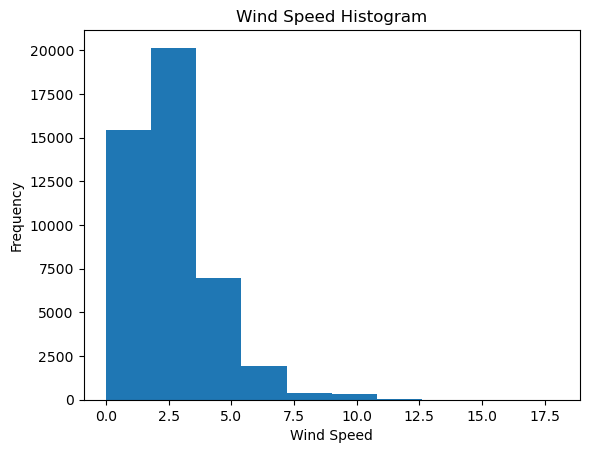

In [4]:
#now let's make a histogram of the wind speed
plt.hist(df['wind_speed'], bins=10)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Histogram')
plt.show()

In [7]:
#we can now repeat this for these cities, and take the resulting averages
# Dallas
# Kansas City
# San Diego
# Los Angeles
# San Francisco
cities = ["Dallas", "Kansas City", "San Diego", "Los Angeles", "San Francisco"]


elevations = {
    "Dallas": 128,
    "Kansas City": 277,
    "San Diego": 19,
    "Los Angeles": 93,
    "San Francisco": 16
} # all in meters above sea level

average_building_height = 67.5 # meters


#use height adjustment formula v = Vref * ln(z/z0)/ln(zref/z0)
# z0 = 1.6 m

Average Building Height:  67.5


In [ ]:
def generate_plot(data, metric, value_labels):
    #plot a histogram, and insert value_labels as vertical lines
    plt.hist(data, bins=10)
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.title(metric + ' Histogram')
    for value in value_labels:
        plt.axvline(x=value, color='r', linestyle='-')
    plt.show()

    
